In [5]:
# Load the data
import pandas as pd
DS = pd.read_csv('data0.csv')

In [6]:
Y = DS[["C_INNOVOUT1","C_INNOVOUT2","C_INNOVOUT3","C_INNOVOUT4","C_INNOVOUT5","C_INNOVOUT6"]]
X = DS[["RevisedTeamNumber",
        #"B_COCRFAC1","B_COCRFAC2","B_COCRFAC3","B_COCRFAC4","B_COCRFAC5","B_COCRFAC6","B_COCRFAC7","B_COCRFAC8","B_COCRFAC9","B_COCRFAC10","B_COCRFAC11","B_COCRFAC12","B_COCRFAC13",
        "M1_COCRFAC1","M1_COCRFAC2","M1_COCRFAC3","M1_COCRFAC4","M1_COCRFAC5","M1_COCRFAC6","M1_COCRFAC7","M1_COCRFAC8","M1_COCRFAC9","M1_COCRFAC10","M1_COCRFAC11","M1_COCRFAC12","M1_COCRFAC13",
        #"M2_COCRFAC1","M2_COCRFAC2","M2_COCRFAC3","M2_COCRFAC4","M2_COCRFAC5","M2_COCRFAC6","M2_COCRFAC7","M2_COCRFAC8","M2_COCRFAC9","M2_COCRFAC10","M2_COCRFAC11","M2_COCRFAC12","M2_COCRFAC13",
        "E_COCRFAC1","E_COCRFAC2","E_COCRFAC3","E_COCRFAC4","E_COCRFAC5","E_COCRFAC6","E_COCRFAC7","E_COCRFAC8","E_COCRFAC9","E_COCRFAC10","E_COCRFAC11","E_COCRFAC12","E_COCRFAC13"]]


# Data pre-processing
## Missing value
Step 1: Filling the missing value by the group mean for each column

Step 2: Filling the missing value by the column mean if the whole group value is missing

In [7]:
# deal with scaling and missing value
from sklearn import preprocessing
import numpy as np
from fancyimpute import IterativeImputer
XY_incomplete = pd.concat([X, Y], axis=1)
XY_incomplete = XY_incomplete[:179]

df = XY_incomplete.copy()
# group by team and deal with missing values
df[["M1_COCRFAC1","M1_COCRFAC2","M1_COCRFAC3","M1_COCRFAC4","M1_COCRFAC5","M1_COCRFAC6","M1_COCRFAC7","M1_COCRFAC8","M1_COCRFAC9","M1_COCRFAC10","M1_COCRFAC11","M1_COCRFAC12","M1_COCRFAC13",
    "E_COCRFAC1","E_COCRFAC2","E_COCRFAC3","E_COCRFAC4","E_COCRFAC5","E_COCRFAC6","E_COCRFAC7","E_COCRFAC8","E_COCRFAC9","E_COCRFAC10","E_COCRFAC11","E_COCRFAC12","E_COCRFAC13",
    "C_INNOVOUT1","C_INNOVOUT2","C_INNOVOUT3","C_INNOVOUT4","C_INNOVOUT5","C_INNOVOUT6"
    ]] = df.groupby(['RevisedTeamNumber'])["M1_COCRFAC1","M1_COCRFAC2","M1_COCRFAC3","M1_COCRFAC4","M1_COCRFAC5","M1_COCRFAC6","M1_COCRFAC7","M1_COCRFAC8","M1_COCRFAC9","M1_COCRFAC10","M1_COCRFAC11","M1_COCRFAC12","M1_COCRFAC13",
    "E_COCRFAC1","E_COCRFAC2","E_COCRFAC3","E_COCRFAC4","E_COCRFAC5","E_COCRFAC6","E_COCRFAC7","E_COCRFAC8","E_COCRFAC9","E_COCRFAC10","E_COCRFAC11","E_COCRFAC12","E_COCRFAC13",
    "C_INNOVOUT1","C_INNOVOUT2","C_INNOVOUT3","C_INNOVOUT4","C_INNOVOUT5","C_INNOVOUT6"].transform(lambda x: x.fillna(x.mean()))
print(df)

     RevisedTeamNumber  M1_COCRFAC1  M1_COCRFAC2  M1_COCRFAC3  M1_COCRFAC4  \
0                  1.0     4.000000     4.000000     4.000000     4.000000   
1                  1.0     2.000000     2.000000     1.000000     1.000000   
2                  1.0     1.000000     1.000000     1.000000     1.000000   
3                  2.0     4.000000     5.000000     3.000000     4.000000   
4                  2.0     4.000000     5.000000     4.000000     1.000000   
5                  2.0     3.000000     2.000000     1.000000     1.000000   
6                  2.0     5.000000     3.000000     3.000000     5.000000   
7                  2.0     4.000000     5.000000     4.000000     4.000000   
8                  3.0     5.000000     3.000000     3.000000     2.000000   
9                  3.0     3.000000     2.000000     2.000000     1.000000   
10                 3.0     2.833333     2.833333     2.666667     1.666667   
11                 3.0     2.000000     3.000000     3.000000   

In [8]:

# fill the other missing value with column mean rather than MICE -- since the filling value will be out of range
'''
# MICE code
ME = df.copy()
n_imputations = 32
XY_completed = []
for i in range(n_imputations):
    imputer = IterativeImputer(n_iter=32, sample_posterior=True, random_state=i)
    #a = imputer.fit_transform(XY_incomplete)
    #print(imputer.fit_transform(XY_incomplete))
XY_completed.append(imputer.fit_transform(ME))

XY_completed_mean = np.mean(XY_completed, 0)
XY_completed_std = np.std(XY_completed, 0)
'''

df.fillna(df.mean(), inplace=True)
df = round(df)
# could add weights on Y1-Y6
Y = np.sum(df[["C_INNOVOUT1","C_INNOVOUT2","C_INNOVOUT3","C_INNOVOUT4","C_INNOVOUT5","C_INNOVOUT6"]],axis = 1)
y = pd.DataFrame(Y,columns=['Y'])#Y.values
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(Y);
X = df[["M1_COCRFAC1","M1_COCRFAC2","M1_COCRFAC3","M1_COCRFAC4","M1_COCRFAC5","M1_COCRFAC6","M1_COCRFAC7","M1_COCRFAC8","M1_COCRFAC9","M1_COCRFAC10","M1_COCRFAC11","M1_COCRFAC12","M1_COCRFAC13",
    "E_COCRFAC1","E_COCRFAC2","E_COCRFAC3","E_COCRFAC4","E_COCRFAC5","E_COCRFAC6","E_COCRFAC7","E_COCRFAC8","E_COCRFAC9","E_COCRFAC10","E_COCRFAC11","E_COCRFAC12","E_COCRFAC13",
    ]]
df = pd.concat([X, y], axis=1)


/Users/wuzheqi/Anaconda3/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/wuzheqi/Anaconda3/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


/Users/wuzheqi/Anaconda3/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


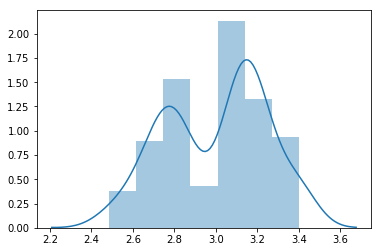

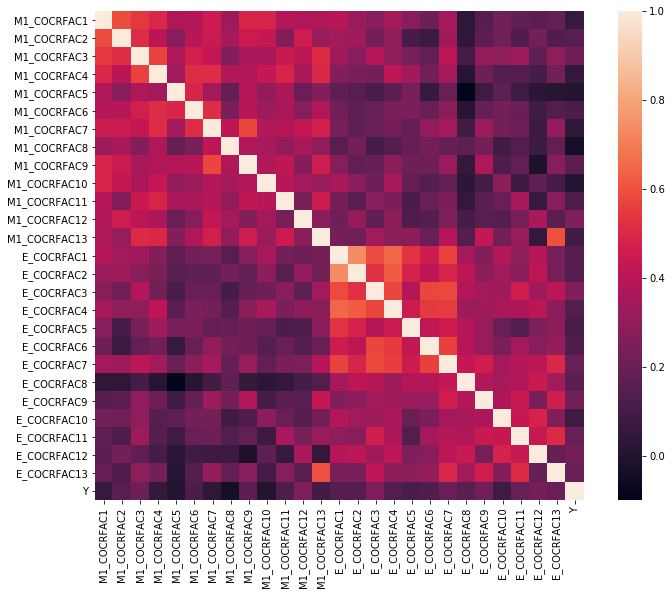

In [5]:
# The log transformation can be used to make highly skewed distributions less skewed. 
sns.distplot(np.log(Y));
df1 = pd.concat([X, np.log(y)], axis=1)
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

Actually, the correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. 

# Feature Selection



## 1. Multifactor Dimensionality Reduction (MDR) method
The basis of the MDR method is a constructive induction or feature engineering algorithm that converts two or more variables or attributes to a single attribute. This process of constructing a new attribute changes the representation space of the data. The end goal is to create or discover a representation that facilitates the detection of nonlinear or nonadditive interactions among the attributes such that prediction is improved over that of the original representation of the data.

In [9]:
from mdr import ContinuousMDR
import pandas as pd

targets = y.values

# construct 4 new features
my_cmdr = ContinuousMDR()
features = X.iloc[:,0:7].values
my_cmdr.fit(features, targets)
M1A = my_cmdr.transform(features)

features = X.iloc[:,10:12].values
my_cmdr.fit(features, targets)
M1B = my_cmdr.transform(features)

features = X.iloc[:,13:20].values
my_cmdr.fit(features, targets)
EA = my_cmdr.transform(features)

features = X.iloc[:,23:25].values
my_cmdr.fit(features, targets)
EB = my_cmdr.transform(features)

In [10]:
X_new4 = np.concatenate([M1A, M1B, EA, EB],axis = 1)
X_new4 = pd.DataFrame(X_new4,columns=['M1A', 'M1B', 'EA', 'EB'])


In [11]:
"""
X_new = pd.concat([X_new4, X], axis=1)
df = pd.concat([X_new, y], axis=1)
df.to_csv('train_bayesian2.csv', encoding='utf-8', index=False)
"""

## 2. Eliminate Redundant Features

In [16]:
import matplotlib.pyplot as plt
import sklearn
import xgboost
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification


#X_new = pd.concat([X_new4, X], axis=1)

# Create the RFE object and compute a cross-validated score.
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

# regression
# Create recursive feature eliminator that scores features by mean squared errors
rfecv = RFECV(estimator=xgb, step=1, scoring='r2',cv=2)

rfecv.fit(X, np.log(y))
rfecv.ranking_
n_feature = 20
criteria = [rfecv.ranking_[i]<n_feature for i in range (len(rfecv.ranking_))] 
print(criteria)
print(rfecv.ranking_)
print("Optimal number of features : %d" % n_feature)

X1 = X.iloc[:, criteria]
print(X1.head())


/Users/wuzheqi/Anaconda3/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, False, True, True, False, False, True, True, True, False, False]
[ 1  5  7  2  4 12 13 20  8 18 21  6 15  9 17  3 24 14 11 26 23 16 10 19
 25 22]
Optimal number of features : 20
   M1_COCRFAC1  M1_COCRFAC2  M1_COCRFAC3  M1_COCRFAC4  M1_COCRFAC5  \
0          4.0          4.0          4.0          4.0          4.0   
1          2.0          2.0          1.0          1.0          1.0   
2          1.0          1.0          1.0          1.0          1.0   
3          4.0          5.0          3.0          4.0          5.0   
4          4.0          5.0          4.0          1.0          4.0   

   M1_COCRFAC6  M1_COCRFAC7  M1_COCRFAC9  M1_COCRFAC10  M1_COCRFAC12  \
0          4.0          4.0          4.0           4.0           4.0   
1          1.0          1.0          1.0           2.0           1.0   
2          1.0          1.0          1.0           1.0           1.0   
3          4.0

In [12]:
# test
X_rank = pd.DataFrame()
cols = X_new.columns.tolist()
print(cols)
cols_rank = []
for i in range(len(rfecv.ranking_)):
     cols_rank.append(cols[rfecv.ranking_[i]-1])
print(cols_rank)
X_rank = X_new[cols_rank]


print(X_rank.head())
#X_rank = pd.concat([X_new4, X_rank], axis=1)
df = pd.concat([X_rank, y], axis=1)
df.to_csv('train_bayesian2.csv', encoding='utf-8', index=False)


['M1A', 'M1B', 'EA', 'EB', 'M1_COCRFAC1', 'M1_COCRFAC2', 'M1_COCRFAC3', 'M1_COCRFAC4', 'M1_COCRFAC5', 'M1_COCRFAC6', 'M1_COCRFAC7', 'M1_COCRFAC8', 'M1_COCRFAC9', 'M1_COCRFAC10', 'M1_COCRFAC11', 'M1_COCRFAC12', 'M1_COCRFAC13', 'E_COCRFAC1', 'E_COCRFAC2', 'E_COCRFAC3', 'E_COCRFAC4', 'E_COCRFAC5', 'E_COCRFAC6', 'E_COCRFAC7', 'E_COCRFAC8', 'E_COCRFAC9', 'E_COCRFAC10', 'E_COCRFAC11', 'E_COCRFAC12', 'E_COCRFAC13']
['M1A', 'M1_COCRFAC2', 'M1_COCRFAC7', 'M1B', 'M1A', 'M1A', 'EA', 'M1A', 'M1A', 'M1B', 'M1A', 'EA', 'M1_COCRFAC3', 'M1_COCRFAC1', 'M1_COCRFAC1', 'EB', 'M1_COCRFAC3', 'EB', 'M1_COCRFAC7', 'M1A', 'M1_COCRFAC6', 'M1_COCRFAC4', 'M1A', 'M1_COCRFAC6', 'M1A', 'M1_COCRFAC5', 'M1A', 'M1_COCRFAC2', 'M1_COCRFAC4', 'M1_COCRFAC5']
   M1A  M1_COCRFAC2  M1_COCRFAC7  M1B  M1A  M1A  EA  M1A  M1A  M1B  \
0    0          4.0          4.0    1    0    0   0    0    0    1   
1    0          2.0          1.0    0    0    0   0    0    0    0   
2    0          1.0          1.0    0    0    0   0    0   

In [45]:
X_rank = pd.DataFrame()
cols = X.columns.tolist()
print(cols)
print(rfecv.ranking_)
cols_rank = []
dic = {}
for i in range(len(rfecv.ranking_)):
     dic[rfecv.ranking_[i]] = i
print(dic)
for i in range(len(rfecv.ranking_)):
     cols_rank.append(cols[dic[i+1]])
print(cols_rank)
X_rank = X[cols_rank]
X_rank = pd.concat([X_new4, X_rank], axis=1)
df = pd.concat([X_rank, y], axis=1)
df.to_csv('train_bayesian.csv', encoding='utf-8', index=False)


['M1_COCRFAC1', 'M1_COCRFAC2', 'M1_COCRFAC3', 'M1_COCRFAC4', 'M1_COCRFAC5', 'M1_COCRFAC6', 'M1_COCRFAC7', 'M1_COCRFAC8', 'M1_COCRFAC9', 'M1_COCRFAC10', 'M1_COCRFAC11', 'M1_COCRFAC12', 'M1_COCRFAC13', 'E_COCRFAC1', 'E_COCRFAC2', 'E_COCRFAC3', 'E_COCRFAC4', 'E_COCRFAC5', 'E_COCRFAC6', 'E_COCRFAC7', 'E_COCRFAC8', 'E_COCRFAC9', 'E_COCRFAC10', 'E_COCRFAC11', 'E_COCRFAC12', 'E_COCRFAC13']
[ 1  5  7  2  4 12 13 20  8 18 21  6 15  9 17  3 24 14 11 26 23 16 10 19
 25 22]
{1: 0, 5: 1, 7: 2, 2: 3, 4: 4, 12: 5, 13: 6, 20: 7, 8: 8, 18: 9, 21: 10, 6: 11, 15: 12, 9: 13, 17: 14, 3: 15, 24: 16, 14: 17, 11: 18, 26: 19, 23: 20, 16: 21, 10: 22, 19: 23, 25: 24, 22: 25}
['M1_COCRFAC1', 'M1_COCRFAC4', 'E_COCRFAC3', 'M1_COCRFAC5', 'M1_COCRFAC2', 'M1_COCRFAC12', 'M1_COCRFAC3', 'M1_COCRFAC9', 'E_COCRFAC1', 'E_COCRFAC10', 'E_COCRFAC6', 'M1_COCRFAC6', 'M1_COCRFAC7', 'E_COCRFAC5', 'M1_COCRFAC13', 'E_COCRFAC9', 'E_COCRFAC2', 'M1_COCRFAC10', 'E_COCRFAC11', 'M1_COCRFAC8', 'M1_COCRFAC11', 'E_COCRFAC13', 'E_COCRFAC8', 

In [15]:
print(X.shape)
print(X1.shape)

(179, 26)
(179, 19)


## 2. Create polynomial features with interaction

In [16]:
X1 = pd.concat([X1, X_new4], axis=1)

from sklearn.preprocessing import PolynomialFeatures
"""
poly2 = PolynomialFeatures(degree = 3)
poly_X = poly2.fit_transform(X1)
poly2.get_feature_names(list(X1))
poly_X = pd.DataFrame(poly_X,columns = poly2.get_feature_names(list(X1)))
df3 = pd.concat([poly_X, y], axis=1)
print(df3.head())
#df3.to_csv('train.csv', encoding='utf-8', index=False)
"""

poly2 = PolynomialFeatures(degree = 2)
poly_X2 = poly2.fit_transform(X1)
poly_X2 = pd.DataFrame(poly_X2,columns = poly2.get_feature_names(list(X1)))
df3 = pd.concat([poly_X2, y], axis=1)
print(df3.head())
#df3.to_csv('train.csv', encoding='utf-8', index=False)


     1  M1_COCRFAC1  M1_COCRFAC2  M1_COCRFAC3  M1_COCRFAC4  M1_COCRFAC5  \
0  1.0          4.0          4.0          4.0          4.0          4.0   
1  1.0          2.0          2.0          1.0          1.0          1.0   
2  1.0          1.0          1.0          1.0          1.0          1.0   
3  1.0          4.0          5.0          3.0          4.0          5.0   
4  1.0          4.0          5.0          4.0          1.0          4.0   

   M1_COCRFAC6  M1_COCRFAC7  M1_COCRFAC9  M1_COCRFAC10  ...   YM1A M1B  \
0          4.0          4.0          4.0           4.0  ...        0.0   
1          1.0          1.0          1.0           2.0  ...        0.0   
2          1.0          1.0          1.0           1.0  ...        0.0   
3          4.0          5.0          3.0           4.0  ...        0.0   
4          1.0          1.0          1.0           4.0  ...        0.0   

   YM1A EA  YM1A EB  M1B^2  M1B EA  M1B EB  EA^2  EA EB  EB^2     Y  
0      0.0      0.0    1.0     0.0

## Knockoff Filter method
In many fields of science, we observe a response variable together with a large number of potential explanatory variables, and we would like to be able to discover which predictors are important for the response. At the same time, we need to assure that most of the discoveries are indeed true and replicable.

As the name suggests, the knockoff filter operates by manufacturing knockoff variables that are cheap — their construction does not require collecting any new data — and are designed to mimic the correlation structure found within the original variables. The knockoffs serve as negative controls and they allow one to identify the truly important predictors, while controlling the false discovery rate (FDR) — the expected fraction of false discoveries among all discoveries.

In [ ]:
# Create the RFE object and compute a cross-validated score.
'''
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

# regression
# Create recursive feature eliminator that scores features by mean squared errors
rfecv = RFECV(estimator=xgb, step=1, scoring='r2')

#rfecv = RFECV(estimator=svr, step=1, cv=StratifiedKFold(2), scoring='r2')
rfecv.fit(poly_X, np.log(y))
rfecv.ranking_
criteria = rfecv.support_ 
print(rfecv.support_ )
print(rfecv.ranking_)
print("Optimal number of features : %d" % rfecv.n_features_)

X2 = poly_X.iloc[:, criteria]
print(X2.head())
'''

If the eliminate feature strategy is very strict, the most important two features would be M1_10*E_9 and M1_11*E9

In [17]:

xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

# regression
# Create recursive feature eliminator that scores features by mean squared errors
rfecv = RFECV(estimator=xgb, step=1, scoring='neg_mean_squared_error',cv=3)

rfecv.fit(poly_X2, np.log(y))
rfecv.ranking_
n_feature = 30
criteria = [rfecv.ranking_[i]<n_feature for i in range (len(rfecv.ranking_))] 
criteria = rfecv.support_ 
print(rfecv.support_ )
print(rfecv.ranking_)
print("Optimal number of features : %d" % n_feature)

X3 = poly_X2.iloc[:, criteria]
print(X3.head())



/Users/wuzheqi/Anaconda3/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False False  True  True False False False
 False  True False  True False  True False False  True  True False False
  True False  True False  True  True False False False False False False
 False False False False False False False  True False False False False
  True  True False  True False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False  True False
 False False False False  True False False  True  True False False False
 False False False False False  True False  True  True False False  True
  True False False False False False False False False False  True False
 False False  True False  True False False  True False False  True False
 False False False False False False False False  True False False False
  True False False False False False False False Fa

In [ ]:
# R kernel
dat = read.csv("train.csv")
X = as.matrix(dat[1:20,-1331])
y = as.numeric(as.matrix(dat[1331]))
library(knockoff)
library(doMC)
library(ranger)

set.seed(111)
#In this scenario we make no assumptions on the distribution of the predictors (which can be considered fixed), but we assume a homoscedastic linear regression model for the response. In this scenario, knockoffs only control the FDR if used in combination with statistics that satisfy the “sufficiency” property. In particular, the default statistics based on the cross-validated lasso are not valid.

#result = knockoff.filter(X, y, knockoffs = create.fixed,fdr = 0.4)
result = result = knockoff.filter(X, y)
print(result)

fdp = function(selected) sum(beta[selected] == 0) / max(1, length(selected))
fdp(result$selected)          


   If we need squared/cubed features or not? not just interaction